In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
def create_dataset(dataset):
    data = pd.read_csv(dataset)
    return data

def check_missing_value(dataframe):
    return dataframe.isnull().sum()

def check_shape(dataframe):
    return dataframe.shape

def check_head(dataframe):
    return dataframe.head(5)

def check_tail(dataframe):
    return dataframe.tail(5)

def check_columns(dataframe):
    return dataframe.columns

def check_info(dataframe):
    return dataframe.info()

def check_dtypes(dataframe):
    return dataframe.dtypes

def check_values_counts(dataframe, x):
    return dataframe.value_counts(dropna = x)

#### https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
print(check_dtypes(train_data))
print('_'*40)
print()
print(check_dtypes(test_data))

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
________________________________________

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Check for missing data

In [10]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


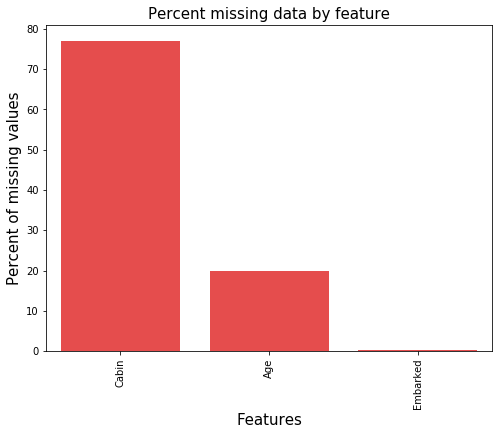

In [11]:
missingdata(train_data)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


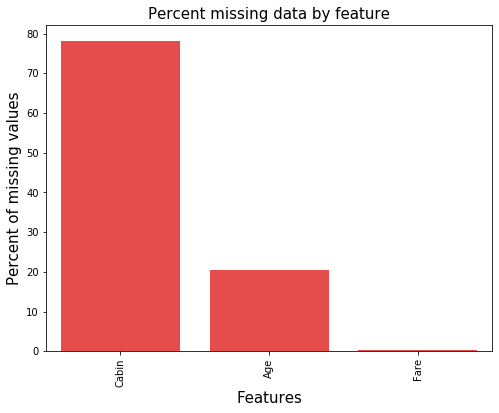

In [12]:
missingdata(test_data)

## Filling Missing values

In [21]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())



### we replace the age with median because they both contain more than 15% of the data
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

## Now, we drop the cabin columns in train and test
del train_data["Cabin"]
del test_data["Cabin"]

In [25]:
train_data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [26]:
#### Those in class 1 had higher chances of surviving
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
#### More Females than Men survived
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
### Those with SibSp (SIblingsSPouse) value of 1 had higher chances of surviving
#### The lesser the number of siblings and spouse, the higher the chances of surviving
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
## Those with Parch(PArentCHildren) value 3 had higher chances pf survival
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


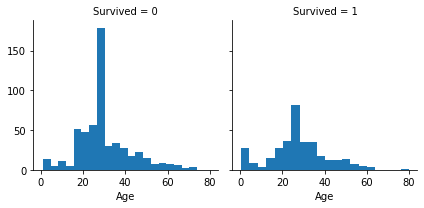

In [33]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

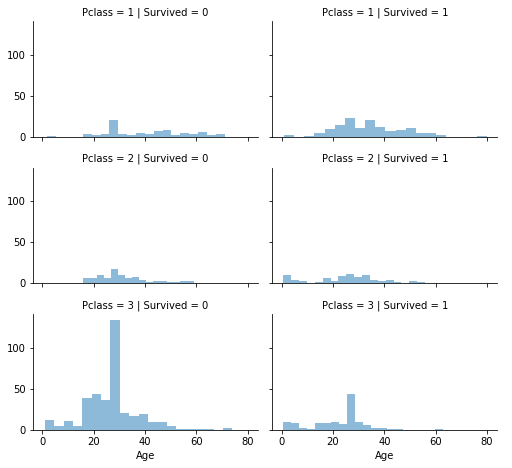

In [34]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

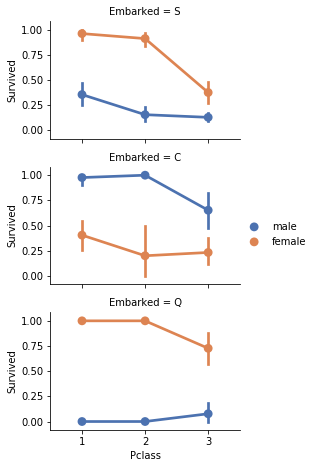

In [35]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

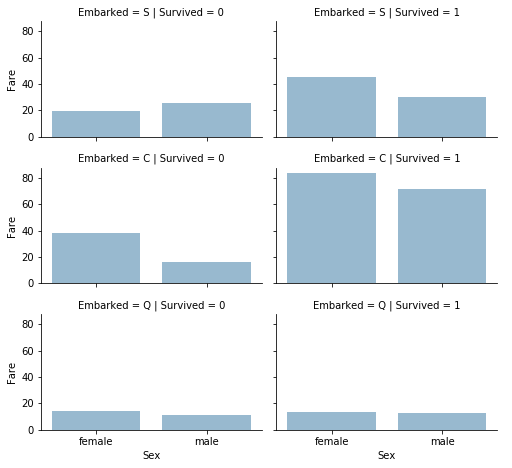

In [36]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [37]:
## combine train and test data
all_data = [train_data, test_data]

In [38]:
## create a new feature 
for i in all_data:
    i['FamilySize'] = i['SibSp'] + i['Parch'] + 1
#     print(i["FamilySize"])

In [39]:
import re

### function that extract titles from the name column
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
     # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
    
### Create a new variable called Title
for i in all_data:
    i["title"] = i["Name"].apply(extract_title)
#     print(i["title"])
    
## Replace the uncommon titles with a single title (rare)
for i in all_data:
    i["title"] = i["title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", 
                            "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    
    i["title"] = i["title"].replace("Mlle", "Miss")
    i["title"] = i["title"].replace("Ms", "Miss")
    i["title"] = i["title"].replace("Mme", "Mrs")

    
    

In [40]:
## Create a new Variable called Age_bin
for i in all_data:
    i["Age_bin"] = pd.cut(i["Age"], bins = [0,12, 20, 40, 120], labels=["Children", "Teenage", "Adult", "Elder"])
    

In [41]:
### Create binning for Fare variable
for i in all_data:
    i["Fare_bin"] = pd.cut(i["Fare"], bins = [0,7.91,14.45,31,120], labels = ["low_fare", "median_fare", "average_fair", "high_fare"])

In [42]:
### Get a copy of train and test set

In [43]:
train_df = train_data.copy()
test_df = test_data.copy()

In [44]:
all_data = [train_df, test_df]

In [45]:
for i in all_data:
    columns = ["Age", "Fare", "Name", "Ticket"]
    i.drop(columns, axis = 1, inplace = True)

In [46]:
train_id = ["PassengerId"]
train_df.drop(train_id, axis=1, inplace = True)

In [47]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,title,Age_bin,Fare_bin
0,0,3,male,1,0,S,2,Mr,Adult,low_fare
1,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,0,3,male,0,0,S,1,Mr,Adult,median_fare


In [48]:
#### Getting dummies

In [49]:
train_df = pd.get_dummies(train_df, columns=["Sex","title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [50]:
test_df = pd.get_dummies(test_df, columns=["Sex","title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [51]:
# test_df

In [52]:
### finding correlations

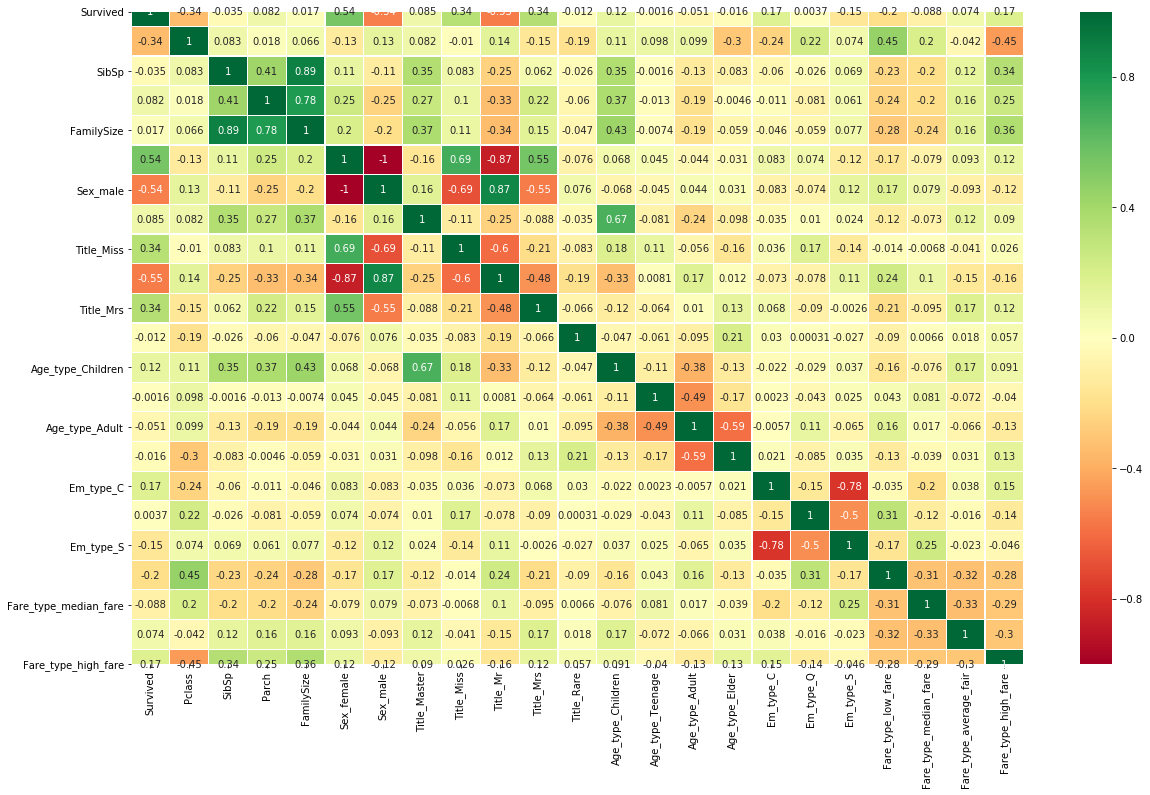

In [53]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [54]:
## pair plots
# g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
#                  size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
# g.set(xticklabels=[])

### Modelling

In [55]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [62]:
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(623, 22) (623,) (268, 22) (268,)


#### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print("The accuracy of this model is", round(accuracy_score(y_test, prediction) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 82.46
The cross validated score for this model is: 81.93


array([[476,  73],
       [ 88, 254]], dtype=int64)

#### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)


model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)


print("The accuracy of this model is", round(accuracy_score(y_test, prediction_rm) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 82.46
The cross validated score for this model is: 83.73


array([[492,  57],
       [ 88, 254]], dtype=int64)

#### SVM

In [92]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)




print("The accuracy of this model is", round(accuracy_score(y_test, prediction_svm) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_svm.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)


The accuracy of this model is 83.58
The cross validated score for this model is: 83.16


array([[492,  57],
       [ 93, 249]], dtype=int64)

#### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)




print("The accuracy of this model is", round(accuracy_score(y_test, prediction_knn) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 81.34
The cross validated score for this model is: 81.26


array([[507,  42],
       [125, 217]], dtype=int64)

#### Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)



print("The accuracy of this model is", round(accuracy_score(y_test, prediction_gnb) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_gnb.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 79.48
The cross validated score for this model is: 79.8


array([[458,  91],
       [ 89, 253]], dtype=int64)

#### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)



print("The accuracy of this model is", round(accuracy_score(y_test, prediction_tree) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_tree.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 79.1
The cross validated score for this model is: 81.71


array([[492,  57],
       [ 96, 246]], dtype=int64)

#### Adaboost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)


print("The accuracy of this model is", round(accuracy_score(y_test, prediction_adb) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb =cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_adb.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 80.22
The cross validated score for this model is: 81.03


array([[470,  79],
       [ 90, 252]], dtype=int64)

#### Linear Discriminant Analysis

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)


print("The accuracy of this model is", round(accuracy_score(y_test, prediction_lda) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lda =cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_lda.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 82.84
The cross validated score for this model is: 82.38


array([[482,  67],
       [ 90, 252]], dtype=int64)

#### Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

print("The accuracy of this model is", round(accuracy_score(y_test, prediction_gbc) * 100, 2))



kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc =cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for this model is:',round(result_gbc.mean()*100,2))

y_pred = cross_val_predict(model, X, y, cv=10)

confusion_matrix(y,y_pred)

The accuracy of this model is 82.46
The cross validated score for this model is: 82.05


array([[494,  55],
       [105, 237]], dtype=int64)

#### Model Evaluation

In [117]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})

models.sort_values(by = "Score", ascending = False)

,Model,Score
3,Random Forest,0.837303
7,Linear Discriminant Analysis,0.823820
6,Gradient Decent,0.820474
2,Logistic Regression,0.819301
8,Decision Tree,0.817091
0,Support Vector Machines,0.812597
1,KNN,0.812597
5,AdaBoostClassifier,0.810325
4,Naive Bayes,0.798002


#### Hyperparameter Tuning

In [120]:
train_X = train_df.drop("Survived", axis=1)
train_Y=train_df["Survived"]
test_X  = test_df.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 22), (891,), (418, 22))

In [159]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)


modelf.fit(train_X,train_Y)

# Best score
print(modelf.best_score_)

# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   25.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   43.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  1.8min finished


0.8204868913857679


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [132]:
### Random Forest

# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   18.8s finished


0.8215868432615656


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best score
print(modell.best_score_)

# Best Estimator
modell.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8215491808423827


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)

In [165]:
from sklearn.svm import SVC, LinearSVC
model= SVC()
param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000], 
             "degree": [0, 1, 2, 3, 4, 5, 6]}

modelsvm = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(train_X,train_Y)

print(modelsvm.best_estimator_)

# Best score
print(modelsvm.best_score_)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 668 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done 1122 tasks      | elapsed:   41.7s
[Parallel(n_jobs=4)]: Done 1472 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1922 tasks      | elapsed:  4.9min


SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8338710689849979


[Parallel(n_jobs=4)]: Done 1960 out of 1960 | elapsed:  5.4min finished


In [ ]:
0.8338710689849979

In [178]:
# SVC = SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
#     max_iter=-1, probability=False, random_state=20, shrinking=True,
#     tol=0.001, verbose=False)

# SVC.fit(train_X, train_Y)


In [179]:
train_df

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_low_fare,Fare_type_median_fare,Fare_type_average_fair,Fare_type_high_fare
0,0,3,1,0,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
5,0,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
6,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
7,0,3,3,1,5,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8,1,3,0,2,3,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
9,1,2,1,0,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [180]:
from sklearn.svm import SVC, LinearSVC
random_forest =SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=30, shrinking=True,
    tol=0.001, verbose=False)

random_forest.fit(train_X, train_Y)


Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)
print(acc_random_forest)

# print("Important features")
# pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
# print('__'*30)
# print(acc_random_forest)

83.84


In [200]:
from sklearn.svm import SVC, LinearSVC
random_forest =RandomForestClassifier(n_estimators=1000,
                             min_samples_split=6,min_samples_leaf=2,
                             max_features='auto',oob_score=True,
                             random_state=2,n_jobs=-1)

random_forest.fit(train_X, train_Y)


Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)
print(acc_random_forest)

86.64


In [201]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})
submission.to_csv('rf.csv', index=False)


In [22]:
train_data.heddad()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
